In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow

rectangle = np.array([[0, 0, 1],
                      [0, 2, 1],
                      [3, 2, 1],
                      [3, 0, 1],
                      [0, 0, 1]])

In [2]:
def plot_shape(points, title):
    """Helper function to plot 2D shapes"""
    plt.figure()
    plt.plot(points[:, 0], points[:, 1], marker='o')
    plt.title(title)
    plt.axis('equal')
    plt.grid()
    plt.show()

def translate(points, tx, ty):
    transformation_matrix = np.array([[1, 0, tx],
                                       [0, 1, ty],
                                       [0, 0, 1]])
    return np.dot(points, transformation_matrix.T)


def scale(points, sx, sy):
    transformation_matrix = np.array([[sx, 0, 0],
                                       [0, sy, 0],
                                       [0,  0, 1]])
    return np.dot(points, transformation_matrix.T)
def rotate(points, angle):
    radians = np.radians(angle)
    transformation_matrix = np.array([[np.cos(radians), -np.sin(radians), 0],
                                       [np.sin(radians),  np.cos(radians), 0],
                                       [0, 0, 1]])
    return np.dot(points, transformation_matrix.T)

def reflect(points, axis):
    if axis == 'x':
        transformation_matrix = np.array([[1, 0, 0],
                                           [0, -1, 0],
                                           [0,  0, 1]])
    elif axis == 'y':
        transformation_matrix = np.array([[-1, 0, 0],
                                           [0,  1, 0],
                                           [0,  0, 1]])
    return np.dot(points, transformation_matrix.T)

def shear(points, shx, shy):
    transformation_matrix = np.array([[1, shx, 0],
                                       [shy, 1, 0],
                                       [0,  0, 1]])
    return np.dot(points, transformation_matrix.T)


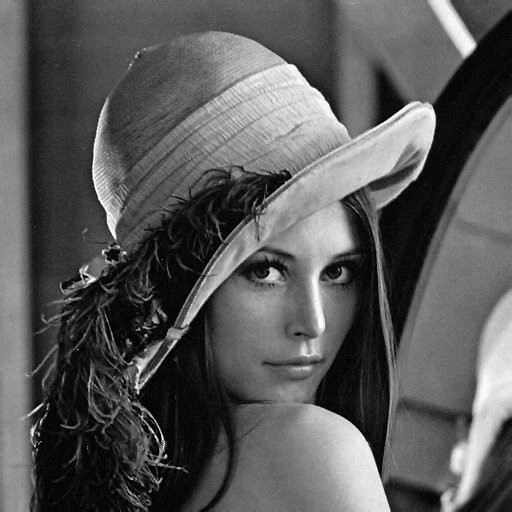

Original Image


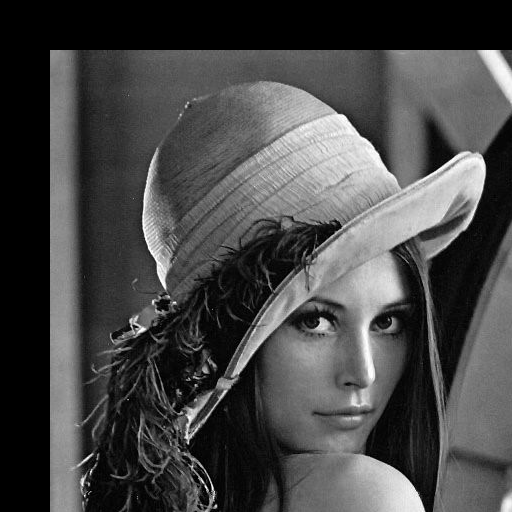

Translated Image


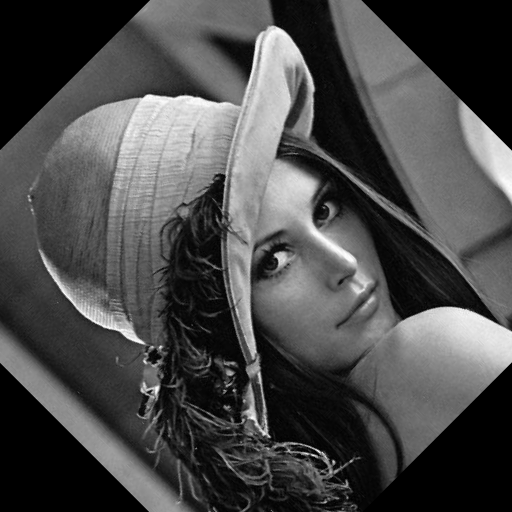

Rotated Image


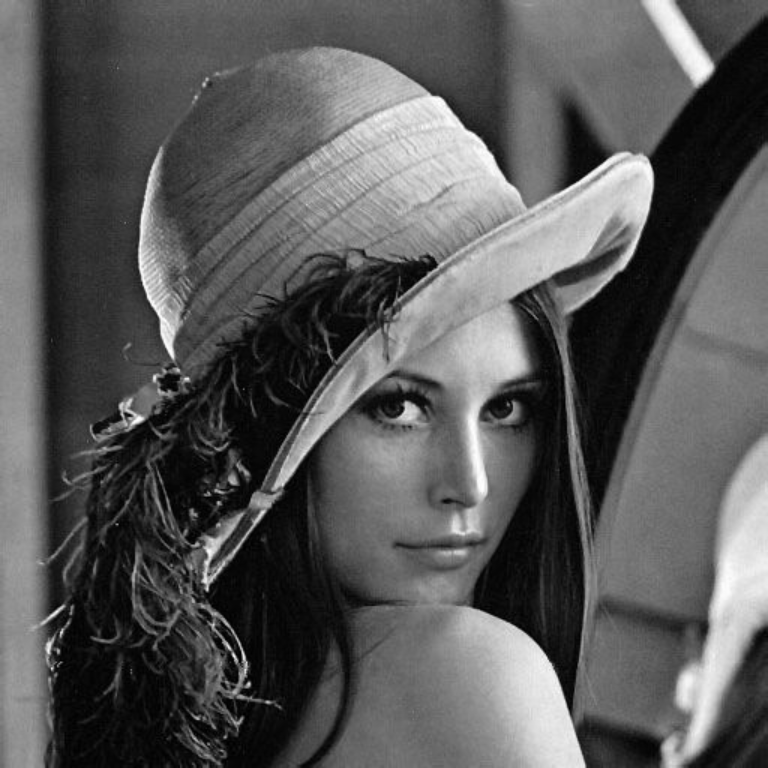

Scaled Image


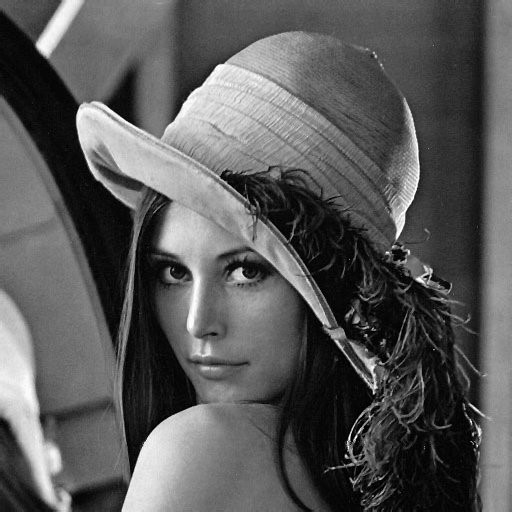

Reflected Image


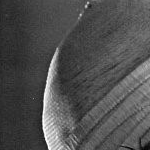

Cropped Image


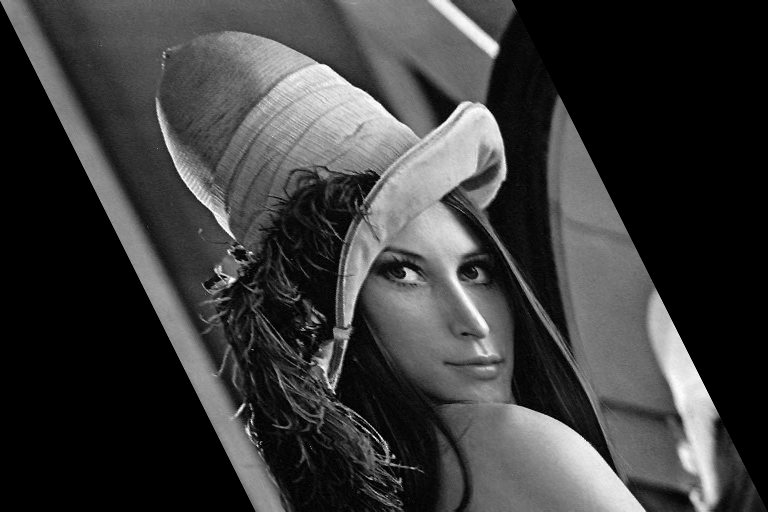

Sheared Image (X-axis)


In [3]:
translated = translate(rectangle, 2, 3)
scaled = scale(translated, 2, 2)
rotated = rotate(scaled, 45)
image = cv2.imread("/content/Picture1.jpg")
if image is None:
    print("Error: Image not found.")
else:
    rows, cols, _ = image.shape

    # Translation
    M_translation = np.float32([[1, 0, 50], [0, 1, 50]])
    translated_image = cv2.warpAffine(image, M_translation, (cols, rows))

    # Rotation
    M_rotation = cv2.getRotationMatrix2D((cols / 2, rows / 2), 45, 1)
    rotated_image = cv2.warpAffine(image, M_rotation, (cols, rows))

    # Scaling
    scaled_image = cv2.resize(image, None, fx=1.5, fy=1.5)

    # Reflection
    reflected_image = cv2.flip(image, 1)  # Horizontal flip

    # Cropping
    cropped_image = image[50:200, 50:200]

    # Shearing
    M_shear_x = np.float32([[1, 0.5, 0], [0, 1, 0]])
    sheared_image_x = cv2.warpAffine(image, M_shear_x, (int(cols * 1.5), rows))



    cv2_imshow(image)
    print("Original Image")
    cv2_imshow(translated_image)
    print("Translated Image")
    cv2_imshow(rotated_image)
    print("Rotated Image")
    cv2_imshow(scaled_image)
    print("Scaled Image")
    cv2_imshow(reflected_image)
    print("Reflected Image")
    cv2_imshow(cropped_image)
    print("Cropped Image")
    cv2_imshow(sheared_image_x)
    print("Sheared Image (X-axis)")

In [4]:
import cv2
from PIL import Image
img=cv2.imread("/content/Picture1.jpg")

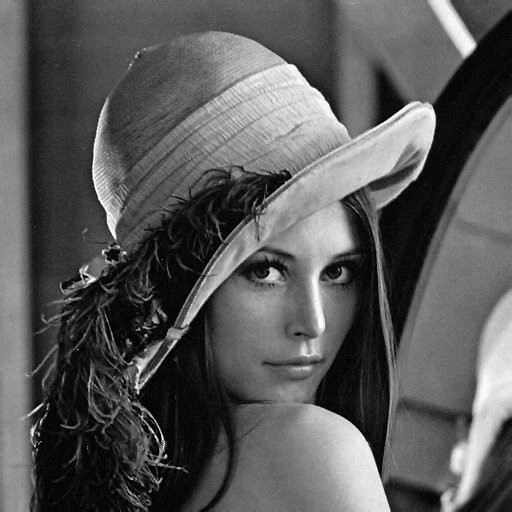

In [5]:
from google.colab.patches import cv2_imshow
cv2_imshow(img)

In [6]:
new_size=(400,200)


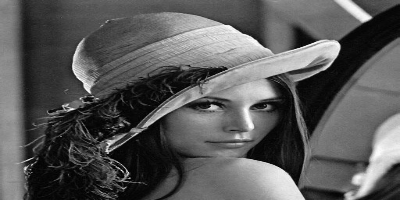

In [7]:
resized_linear=cv2.resize(img,new_size,interpolation=cv2.INTER_LINEAR)
cv2_imshow(resized_linear)

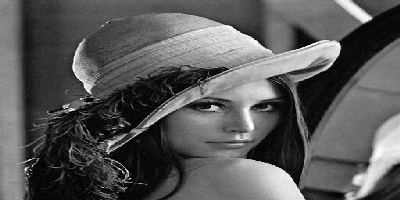

In [8]:
resize_nearest=cv2.resize(img,new_size,interpolation=cv2.INTER_NEAREST)
cv2_imshow(resize_nearest)

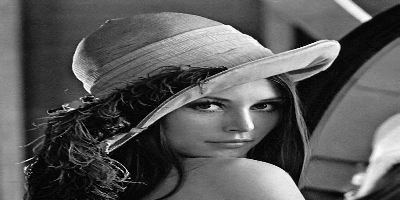

In [9]:
resize_cubic=cv2.resize(img,new_size,interpolation=cv2.INTER_CUBIC)
cv2_imshow(resize_cubic)

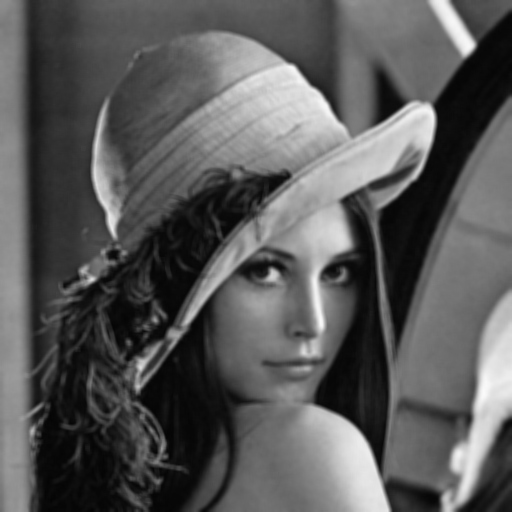

In [10]:
kernel_size=(5,5)
box_blur=cv2.blur(img,kernel_size)
cv2_imshow(box_blur)

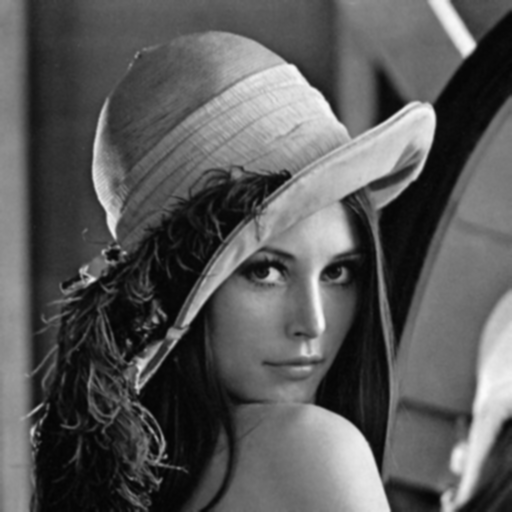

In [11]:
sigma=0
gaussian_blur=cv2.GaussianBlur(img,kernel_size,sigma)
cv2_imshow(gaussian_blur)

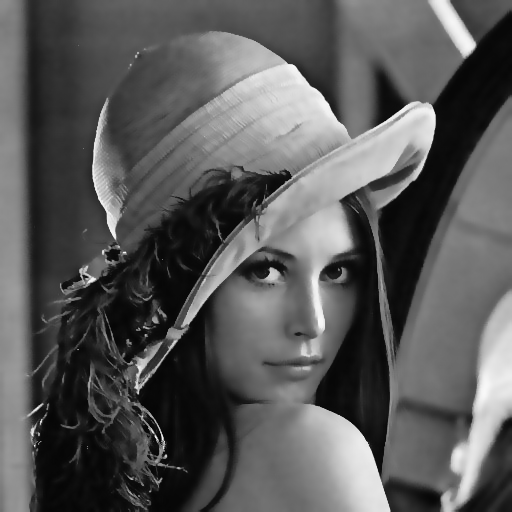

In [12]:
diameter=9
sigma_color=75
sigma_space=75
bilateral_blur=cv2.bilateralFilter(img,diameter,sigma_space,sigma_space)
cv2_imshow(bilateral_blur)

In [13]:
from keras.datasets import mnist
from sklearn.datasets import fetch_openml
import numpy as np
import matplotlib.pyplot as plt
(x_train,y_train),(x_test,y_test)=mnist.load_data()
x_train = x_train.reshape(x_train.shape[0], -1) / 255.0
x_test = x_test.reshape(x_test.shape[0], -1) / 255.0

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Naive Bayes Results:
Accuracy: 0.5558
Precision: 0.6917258486386416
Recall: 0.5558
F1 Score: 0.5170420327932064
Confusion Matrix:
[[ 870    0    3    5    2    5   31    1   35   28]
 [   0 1079    2    1    0    0   10    0   38    5]
 [  79   25  266   91    5    2  269    4  271   20]
 [  32   39    6  353    2    3   51    8  409  107]
 [  19    2    5    4  168    7   63    7  210  497]
 [  71   25    1   20    3   44   40    2  586  100]
 [  12   12    3    1    1    7  895    0   26    1]
 [   0   15    2   10    5    1    5  280   39  671]
 [  13   72    3    7    3   11   12    4  648  201]
 [   5    7    3    6    1    0    1   13   18  955]]

Random Forest Results:
Accuracy: 0.9704
Precision: 0.9703956228285179
Recall: 0.9704
F1 Score: 0.9703722598097009
Confusion Matrix:
[[ 971    0    0    0    0    2    3    1    3    0]
 [   0 1127    2    2    0    1    2    0    1    0]
 [   6    0 1002    5    3    0    3    8    5    0]
 [   1    0    9  972    0    9    0    9    8 

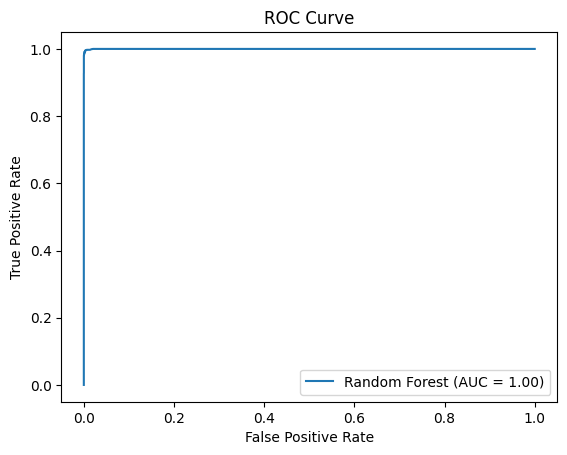

In [14]:
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
from keras.datasets import mnist
import matplotlib.pyplot as plt

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocess the data
x_train = x_train.reshape(x_train.shape[0], -1) / 255.0
x_test = x_test.reshape(x_test.shape[0], -1) / 255.0

# Select two algorithms to implement (Naive Bayes and Random Forest for example)

# 1. Naive Bayes Classifier
nb_model = GaussianNB()
nb_model.fit(x_train, y_train)
nb_predictions = nb_model.predict(x_test)

# Metrics for Naive Bayes
nb_accuracy = accuracy_score(y_test, nb_predictions)
nb_precision = precision_score(y_test, nb_predictions, average='weighted')
nb_recall = recall_score(y_test, nb_predictions, average='weighted')
nb_f1 = f1_score(y_test, nb_predictions, average='weighted')
nb_cm = confusion_matrix(y_test, nb_predictions)

# 2. Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)
rf_predictions = rf_model.predict(x_test)

# Metrics for Random Forest
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_precision = precision_score(y_test, rf_predictions, average='weighted')
rf_recall = recall_score(y_test, rf_predictions, average='weighted')
rf_f1 = f1_score(y_test, rf_predictions, average='weighted')
rf_cm = confusion_matrix(y_test, rf_predictions)

# ROC and AUC for Random Forest
rf_probs = rf_model.predict_proba(x_test)
rf_roc_auc = roc_auc_score(y_test, rf_probs, multi_class='ovr')
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs[:, 1], pos_label=1)

# Display Results
print("Naive Bayes Results:")
print(f"Accuracy: {nb_accuracy}")
print(f"Precision: {nb_precision}")
print(f"Recall: {nb_recall}")
print(f"F1 Score: {nb_f1}")
print(f"Confusion Matrix:\n{nb_cm}")

print("\nRandom Forest Results:")
print(f"Accuracy: {rf_accuracy}")
print(f"Precision: {rf_precision}")
print(f"Recall: {rf_recall}")
print(f"F1 Score: {rf_f1}")
print(f"Confusion Matrix:\n{rf_cm}")
print(f"AUC: {rf_roc_auc}")

# Plot ROC Curve for Random Forest
plt.figure()
plt.plot(rf_fpr, rf_tpr, label=f"Random Forest (AUC = {rf_roc_auc:.2f})")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()
